Objective : Create Smaller PCA test and train to see if performance difference. Or if we just want to work with something smaller. 

In [20]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import scanpy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import loompy

In [21]:
path = "D:/milestone project/SIADS_694_695_Milestone_II/"
X_test_csv = path + "data/X_test.csv"
X_train_csv = path + "data/X_train.csv"

In [22]:
#train
# We are going to be following the same steps as above so everything will be in a single block instead of being spread across multiple
RANDOM_SEED = 42
X_train_anndata = sp.read_csv(X_train_csv)
sp.pp.normalize_total(X_train_anndata, target_sum=1e4)
sp.pp.log1p(X_train_anndata)
sp.pp.highly_variable_genes(X_train_anndata, min_mean=0.0125, max_mean=3, min_disp=0.5)
X_train_anndata.raw = X_train_anndata
sp.pp.scale(X_train_anndata, max_value=10)
sp.tl.pca(X_train_anndata, n_comps=37, random_state=RANDOM_SEED)
X_train_pca = pd.DataFrame(X_train_anndata.obsm['X_pca'], columns=["PC_{}".format(i) for i in range(1,38)], index=X_train_anndata.obs_names)
X_train_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37
TCAGCTCCACTGTTAG_18,-4.992895,1.977501,2.635593,0.294222,-0.352568,0.480020,-0.607564,0.537432,0.354950,0.988230,...,-0.781704,-0.577598,0.644547,-1.132056,-0.382826,-0.789138,0.838497,-0.529794,-0.888051,-1.349112
TGCTGCTTCGTGGTCG_24,10.464967,-4.179815,10.248424,13.373024,-0.398257,-1.284947,2.211712,0.475666,-0.210214,2.024231,...,-0.041053,-0.290493,0.636597,-1.487101,0.271746,0.921873,-1.181219,-0.262840,0.956303,0.195289
TAAACCGAGCCAGTTT_23,11.897514,10.368369,-9.752713,-0.730839,-6.437623,-3.039106,1.156008,-0.674257,1.225246,0.872166,...,-1.043532,0.788834,0.357533,-1.314644,-0.716496,-0.060888,-2.065207,-1.125470,-0.325971,1.658957
GTAGTCACAGACAAGC_16,0.143760,-8.355665,-4.339656,-0.964087,1.019565,-0.285467,-0.621730,-0.871517,0.075751,-0.569461,...,-0.285794,0.674263,-0.272066,0.418885,0.620225,-0.654810,-2.505107,0.013176,-1.136860,3.856147
CTAATGGGTCCAACTA_14,-4.288420,1.525259,2.442544,-1.382998,0.668752,2.043460,-2.643858,1.329930,-2.210889,-2.007619,...,-2.060783,2.239780,-0.485600,1.019139,-0.302954,2.051380,-0.313067,-1.007869,-0.559401,-1.762307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTACGTCAGTTACGGG_23,-3.217071,3.317135,0.734164,-0.171840,-2.589299,1.034889,0.091526,1.328650,0.166673,0.536799,...,0.260896,-0.524861,-1.375638,-1.080951,0.812044,0.386919,0.047962,0.294086,-0.479867,0.277668
AGGTCATAGCTCCCAG_19,3.871935,5.376073,-0.844300,-1.208045,12.304904,-12.572670,1.558632,1.102539,2.344620,0.131254,...,2.730795,3.195179,2.560588,-1.097565,-2.710424,1.287707,1.917532,-0.018581,-2.624925,2.455522
GGATTACAGCACACAG_23,-3.675456,4.540850,1.770659,-1.032972,-2.875719,0.858731,-1.186408,1.848590,-1.039354,-1.014763,...,1.096950,2.417447,-1.855319,-3.215745,0.732503,-0.085101,0.091544,0.246514,0.683902,-0.841723
CGTGTCTGTTTGCATG_17,-4.479666,1.568706,1.886742,-0.100764,-1.068603,0.053148,-0.073404,0.830151,0.781052,0.594127,...,1.579895,-0.780994,-1.138037,0.111693,1.109087,1.125266,-1.020865,0.178365,-0.270520,0.401417


In [23]:
#test
# this code is the same only variable swap
# We are going to be following the same steps as above so everything will be in a single block instead of being spread across multiple
RANDOM_SEED = 42
X_test_anndata = sp.read_csv(X_test_csv)
sp.pp.normalize_total(X_test_anndata, target_sum=1e4)
sp.pp.log1p(X_test_anndata)
sp.pp.highly_variable_genes(X_test_anndata, min_mean=0.0125, max_mean=3, min_disp=0.5)
X_test_anndata.raw = X_test_anndata
sp.pp.scale(X_test_anndata, max_value=10)
sp.tl.pca(X_test_anndata, n_comps=37, random_state=RANDOM_SEED)
X_test_pca = pd.DataFrame(X_test_anndata.obsm['X_pca'], columns=["PC_{}".format(i) for i in range(1,38)], index=X_test_anndata.obs_names)
X_test_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37
GTCTCGTCAGTCCTTC_14,-2.121862,2.744559,1.005700,0.330698,1.934029,2.341626,-3.875838,0.775419,-1.268070,0.357644,...,0.847985,-2.310481,-1.803366,0.482967,0.996328,-1.872860,0.906067,-0.679876,1.208012,0.541761
TTGAGGTGATCACG_11,-5.620925,2.676951,3.018111,-0.443643,-0.667588,1.502357,-0.397373,-0.601443,-0.725639,-0.053180,...,0.509467,1.062461,0.667903,1.596333,2.052056,0.999832,-0.041503,-1.525512,-0.218104,-0.893278
TGCCAGCTGGATCT_1,4.761627,5.481069,-2.692782,-1.248273,1.187205,-3.817784,4.808853,-1.325154,4.023220,1.889403,...,1.798144,-4.764619,-0.466416,1.264450,1.614052,-2.869783,-1.547452,1.813711,1.121723,2.652107
TGAGAGGCATGTCGAT_17,-0.912346,-11.043003,-8.724880,-0.180806,-0.210754,-0.494626,0.710565,-2.521290,0.439418,-0.063895,...,-2.021472,-0.852732,-0.158968,0.906255,-0.894305,0.317248,0.132868,0.668342,-0.156173,1.515529
TCTCATAAGTTTAGGA_24,-3.657376,0.729682,1.696968,0.193875,-0.404606,0.375960,-0.099049,-0.274294,0.923656,0.010605,...,-0.880513,-0.234942,1.650630,-0.587876,-0.378193,-0.195072,-0.827654,0.768473,0.591855,0.904110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCCTAGCATTAACCG_19,-1.072867,1.475952,0.460633,-1.585916,-0.057278,0.032045,3.343787,9.551895,-0.963300,-2.106729,...,-2.763665,0.612251,2.339370,-1.106658,-1.630060,1.710236,-0.510525,0.877807,0.465033,1.143538
TCTATTGTCATGCAAC_20,-4.458005,2.727513,3.089558,-0.722310,0.654923,-0.025401,0.462284,-2.945135,-0.254652,0.000050,...,0.395388,-1.278815,-1.230282,0.306632,-0.682512,-0.626841,-0.278715,-1.745442,0.456353,-0.147021
GCTTCCATCAAGGTAA_21,2.713283,-10.394164,-9.289562,-1.616832,-0.955658,1.264871,2.110092,-0.943274,0.539980,-0.307622,...,4.156516,1.725569,-3.680956,0.346109,1.365561,0.167082,-1.310524,-2.770006,-0.210428,-0.842876
CTCGTCAGTCCCTACT_19,-5.039544,2.453929,3.206165,0.123347,-0.746609,0.715160,-0.338598,0.074381,0.197560,-0.671676,...,-0.911203,1.017198,0.767887,0.173390,0.439665,-0.045968,0.268874,0.612701,-0.476639,-0.223599


In [30]:
# Write the PCA data out to CSV files so they can be easily loaded in different notebooks
X_train_pca_csv = path + "data/X_train_37pca.csv"
X_test_pca_csv = path + "data/X_test_37pca.csv"
X_train_pca.to_csv(X_train_pca_csv)
X_test_pca.to_csv(X_test_pca_csv)

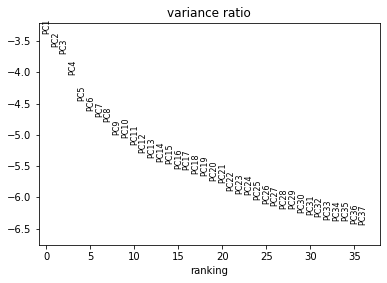

In [24]:
# Look at the results of PCA to determine which is the "best" number of PC's to use
sp.pl.pca_variance_ratio(X_train_anndata, n_pcs=37, log=True)

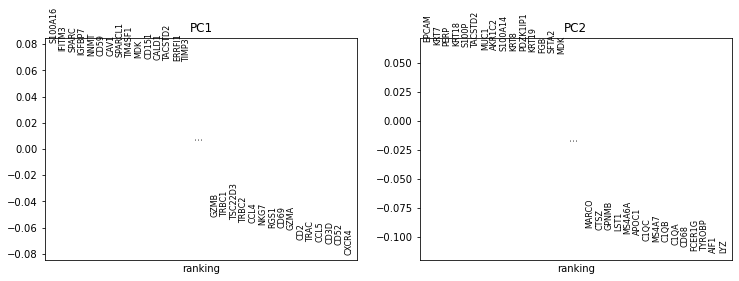

In [25]:
sp.pl.pca_loadings(X_train_anndata, components = '1,2')

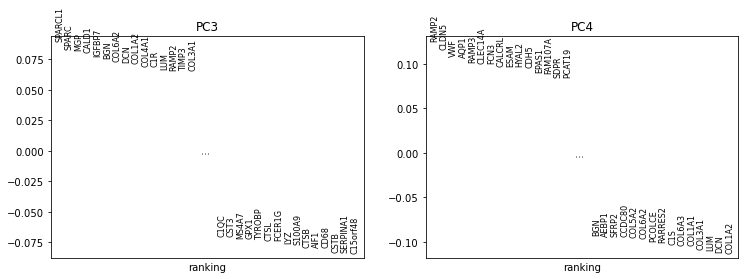

In [26]:
sp.pl.pca_loadings(X_train_anndata, components = '3,4')

In [27]:
variance explained by principal component
X_train_anndata.uns['pca']['variance_ratio']

array([0.033965  , 0.02765697, 0.02470699, 0.01756103, 0.01166724,
       0.0098944 , 0.00892977, 0.00833114, 0.00671803, 0.00640022,
       0.00572996, 0.00506191, 0.00466778, 0.00434104, 0.00424787,
       0.00392862, 0.00383543, 0.00360025, 0.00347341, 0.00320965,
       0.00310051, 0.00273382, 0.00260002, 0.00257278, 0.00238683,
       0.00224286, 0.00216979, 0.00207538, 0.00207013, 0.00193546,
       0.00186209, 0.00181523, 0.00172927, 0.0017001 , 0.00168829,
       0.00161433, 0.0016006 ], dtype=float32)

In [28]:
# this is variance explained
sum(X_train_anndata.uns['pca']['variance_ratio'])

0.23382421536371112

In [29]:
variance explained, eigenvalues of covariance matrix
X_train_anndata.uns['pca']['variance']

array([46.4377   , 37.813217 , 33.77994  , 24.00982  , 15.951708 ,
       13.527844 , 12.208973 , 11.390523 ,  9.185037 ,  8.750525 ,
        7.834124 ,  6.920753 ,  6.3818917,  5.935167 ,  5.807779 ,
        5.371289 ,  5.2438784,  4.922334 ,  4.748929 ,  4.388304 ,
        4.239089 ,  3.737736 ,  3.5548089,  3.5175645,  3.2633274,
        3.0664828,  2.9665828,  2.8375087,  2.830334 ,  2.6462083,
        2.5458846,  2.4818213,  2.3642998,  2.3244123,  2.3082654,
        2.2071505,  2.1883821], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

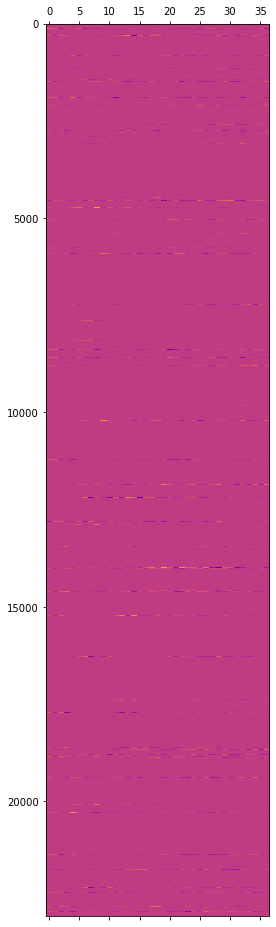

In [31]:
# heatmap of PCA loadings
plt.matshow(X_train_anndata.varm['PCs'], aspect='auto', cmap = 'plasma')
plt.show